## Introduction 

Visualization is a critical component in exploratory data analysis, as well as presentations
and applications. During exploratory data analysis, you are usually working alone or in small
groups and need to create plots quickly to help you better understand your data. It can help
you identify outliers and missing data, or it can spark other questions of interest that will lead
to further analysis and more visualizations. This type of visualization is usually not done with
the end user in mind. It is strictly to help you better your current understanding. The plots do
not have to be perfect.
When preparing visualizations for a report or application, a different approach must be
used. You should pay attention to small details. Also, you usually will have to narrow down
all possible visualizations to only the select few that best represent your data. Good data
visualizations have the viewer enjoying the experience of extracting information. Almost like
movies that make viewers get lost in them, good visualizations will have lots of information
that really sparks interest.
The primary data visualization library in Python is matplotlib, a project begun in the early
2000s, that was built to mimic the plotting capabilities from Matlab. Matplotlib is enormously
capable of plotting most things you can imagine, and it gives its users tremendous power to
control every aspect of the plotting surface.

That said, it is not the friendliest library for beginners to grasp. Thankfully, pandas makes
visualizing data very easy for us and usually plots what we want with a single call to the plot
method. pandas does no plotting on its own. It internally calls matplotlib functions to create
the plots.
Seaborn is also a visualization library that wraps matplotlib and does not do any actual
plotting itself. Seaborn makes beautiful plots and has many types of plots that are not
available from matplotlib or pandas. Seaborn works with tidy (long) data, while pandas works
best with aggregated (wide) data. Seaborn also accepts pandas DataFrame objects in its
plotting functions.
Although it is possible to create plots without ever running any matplotlib code, from time to
time, it will be necessary to use it to tweak finer plot details manually. For this reason, the first
two recipes will cover some basics of matplotlib that will come in handy if you need to use it.
Other than the first two recipes, all plotting examples will use pandas or seaborn.
Visualization in Python does not have to rely on matplotlib. Bokeh is quickly becoming a very
popular interactive visualization library targeted for the web. It is completely independent of
matplotlib, and it's capable of producing entire applications. There are other plotting libraries
as well and future versions of pandas will probably have the capability to use plotting engines
other than matplotlib.

## Getting started with matplotlib

For many data scientists, the vast majority of their plotting commands will use pandas or
seaborn, both rely on matplotlib to do the plotting. However, neither pandas nor seaborn
offers a complete replacement for matplotlib, and occasionally you will need to use
matplotlib. For this reason, this recipe will offer a short introduction to the most crucial
aspects of matplotlib.

In [27]:
%matplotlib inline

In [28]:
import plotly

### Object-oriented guide to matplotlib

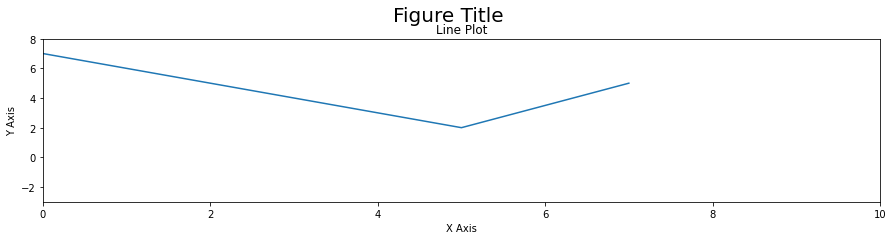

In [29]:
import matplotlib.pyplot as plt

x = [-3, 5, 7]
y = [10, 2, 5]
fig = plt.figure(figsize=(15, 3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)
fig.savefig('c13-fig1.png', dpi=300, bbox_inches='tight')

The object-oriented approach is shown as follows:

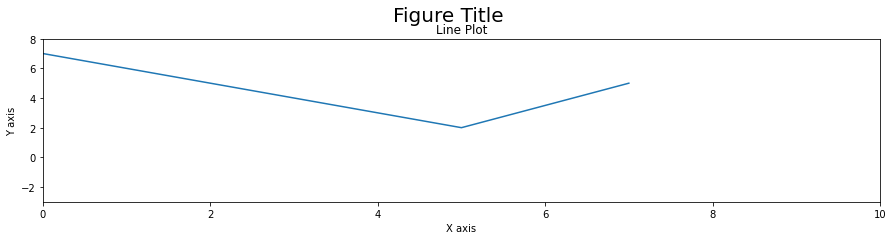

In [30]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

from IPython.core.display import display
fig = Figure(figsize=(15, 3))
FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)
display(fig)
fig.savefig('c13-fig2.png', dpi=300, bbox_inches='tight')


In practice, I combine the two approaches and my code would look like this:

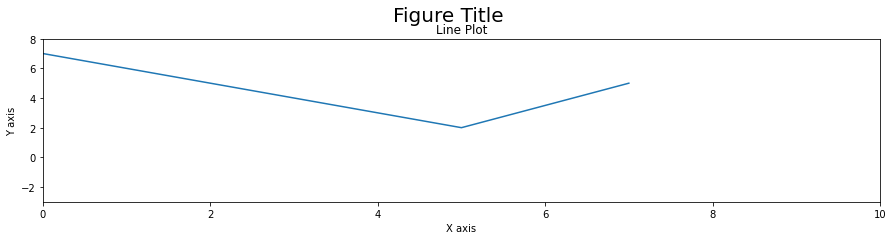

In [31]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(x, y)
ax.set(xlim=(0, 10), ylim=(-3, 8),
      xlabel='X axis', ylabel='Y axis',
       title='Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)
fig.savefig('c13-fig3.png', dpi=300, bbox_inches='tight')


To get started with matplotlib using the object-oriented approach, you will need to
import the pyplot module and alias plt:

In [32]:
import matplotlib.pyplot as plt

Typically, when using the object-oriented approach, we will create a Figure and one or
more Axes objects. Let's use the subplots function to create a figure with a single
axes:

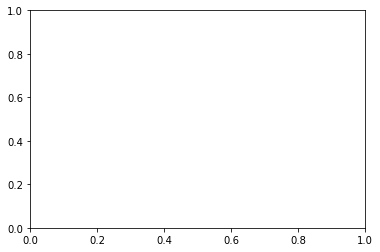

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.savefig('c13-step2.png', dpi=300)

The subplots function returns a two-item tuple object containing the Figure and one
or more Axes objects (here it is just one), which is unpacked into the variables fig
and ax. From here on out, we will use these objects by calling methods in a normal
object-oriented approach:

In [9]:
fig.get_size_inches()


array([6., 4.])

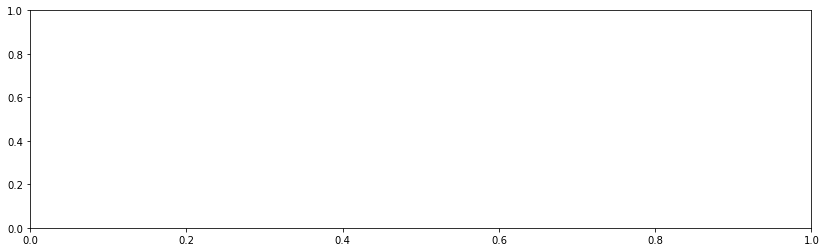

In [12]:
fig.set_size_inches(14, 4)
fig.savefig('c13-step4.png', dpi=300)
fig

Before we start plotting, let's examine the matplotlib hierarchy. You can collect all
the axes of the figure with the .axes attribute:

In [13]:
fig.axes

[<AxesSubplot:>]

The previous command returns a list of all the Axes objects. However, we already
have our Axes object stored in the ax variable. Let's verify that they are the same
object:

In [14]:
fig.axes[0] is ax

True

To help differentiate the Figure from the Axes, we can give each one a unique
facecolor. Matplotlib accepts a variety of different input types for color. Approximately
140 HTML colors are supported by their string name (see this list: http://bit.
ly/2y52UtO). You may also use a string containing a float from zero to one to
represent shades of gray:

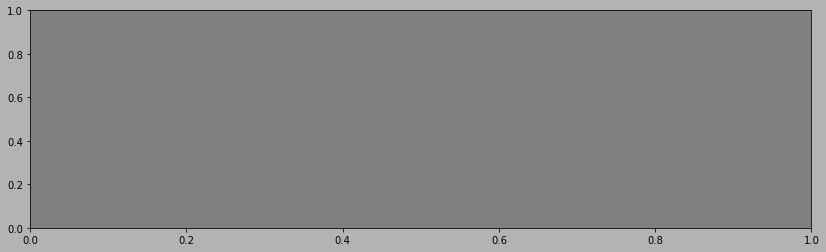

In [18]:
fig.set_facecolor('.7')
ax.set_facecolor('.5')
fig.savefig('c13-step7.png', dpi=300, facecolor='.7')
fig

Now that we have differentiated between the Figure and the Axes, let's take a look at
all of the immediate children of the Axes with the .get_children method:

In [16]:
ax_children = ax.get_children()
ax_children

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

Most plots have four spines and two axis objects. The spines represent the data
boundaries and are the four physical lines that you see bordering the darker gray
rectangle (the axes). The x and y axis objects contain more plotting objects such as
the ticks and their labels and the label of the entire axis. We can select the spines
from the result of the .get_children method, but it is easier to access them with
the .spines attribute:

In [19]:
spines = ax.spines
spines

The spines are contained in an ordered dictionary. Let's select the left spine and
change its position and width so that it is more prominent and also make the bottom
spine invisible:

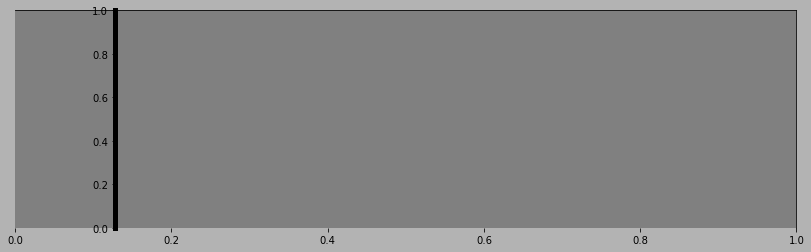

In [21]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)
spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig.savefig('c13-step10.png', dpi=300, facecolor='.7')
fig

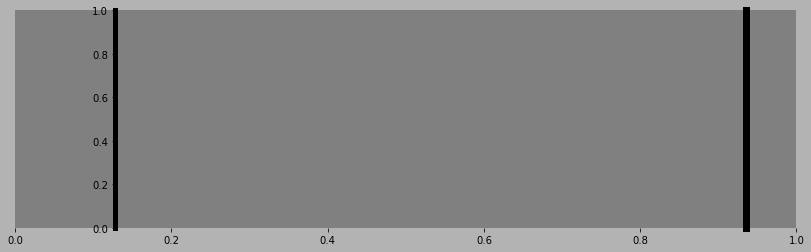

In [22]:
spine_right = spines['right']
spine_right.set_position(('outward', -50))
spine_right.set_linewidth(7)
spine_top = spines['top']
spine_top.set_visible(False)
fig.savefig('c13-step110.png', dpi=300, facecolor='.7')
fig

Now, let's focus on the axis objects. We can access each axis through the .xaxis
and .yaxis attributes. Some axis properties are also available with the Axes object.
In this step, we change some properties of each axis in both manners:

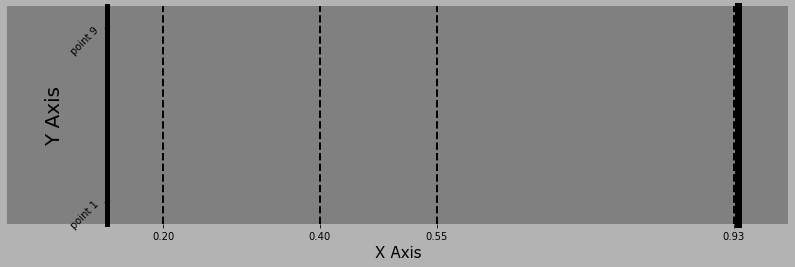

In [27]:
ax.xaxis.grid(True, which='major', linewidth=2, 
             color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)
ax.set_ylabel('Y Axis', family='Gotham', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig.savefig('c13-step11.png', dpi=300, facecolor='.7')
fig

The plt.subplots returns a tuple. The first element is the Figure, and the second element
is the Axes object. This tuple gets unpacked as two variables, fig and ax. If you are not
accustomed to tuple unpacking, it may help to see step 2 written like this

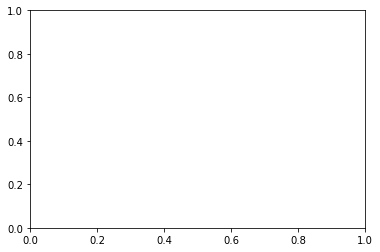

In [29]:
plot_objects = plt.subplots(nrows=1, ncols=1)
type(plot_objects)

fig = plot_objects[0]
ax = plot_objects[1]
fig.savefig('c13-1-works.png', dpi=300)

If you create more than one Axes with plt.subplots, then the second item in the tuple is a
NumPy array containing all the Axes. Let's demonstrate that here:

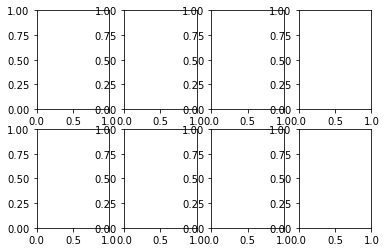

In [32]:
fig, axs = plt.subplots(2, 4)
fig.savefig('c13-1-work2.png', dpi=300)

In [33]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

Step 3 verifies that we indeed have Figure and Axes objects referenced by the appropriate
variables. In step 4, we come across the first example of getter and setter methods. Matplotlib
defaults all figures to 6 inches in width by 4 inches in height, which is not the actual size of it
on the screen, but would be the exact size if you saved the Figure to a file (with a dpi of 100
pixels per inch).

Step 5 shows that, in addition to the getter method, you can sometimes access another
plotting object by its attribute. Often, there exist both an attribute and a getter method to
retrieve the same object. For instance, look at these examples:

In [34]:
ax = axs[0][0]

In [35]:
fig.axes == fig.get_axes()

True

In [36]:
ax.xaxis == ax.get_xaxis()

True

In [37]:
ax.yaxis == ax.get_yaxis()

True

In [38]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 121.80363636363634, ''),
  Text(1, 122.80363636363634, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x2f7933164c0>,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 432x288 with 8 Axes>,
 'gid': None,
 'gridlines': <a list of 3 Line2D gridline objects>,
 'in_layout': True,
 'inverted': False,
 'label': Text(0.5, 121.80363636363634, ''),
 'label_position': 'bottom',
 'label_text': '',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x2f793a2d4f0>,
 'major_locator': <matplotlib.ticker.AutoLocator at 0x2f793a2d580>,
 'major_ticks': [<matplotlib.axis.XTick at 0x2f793b92c10>,
 'majorticklabels': [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0')],
 'majorticklines': <a list of 6 Line2D ticklines objects>,
 'majorticklocs': array([0. , 0.5, 1. ]),
 'minor_formatter': <matplotlib.ticker.NullFormatter at

### Visualizing data with matplotlib

In [4]:
import pandas as pd
import numpy as np
alta = pd.read_csv('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/alta-noaa-1980-2019.csv')

In [41]:
alta

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-03,NaN,NaN,NaN,NaN,...,0.0,74.0,57.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN
14156,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-04,NaN,NaN,NaN,NaN,...,0.0,77.0,52.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
14157,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-05,NaN,NaN,NaN,NaN,...,0.0,76.0,54.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
14158,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-06,NaN,NaN,NaN,NaN,...,0.0,66.0,52.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# get the data for 2018-2018 session

data = (alta
       .assign(DATE=lambda df_: pd.to_datetime(df_.DATE))
        .set_index('DATE')
        .loc['2018-09': '2019-08']
        .SNWD
       )

In [45]:
data

DATE
2018-09-01    0.0
2018-09-02    0.0
2018-09-03    0.0
2018-09-04    0.0
2018-09-05    0.0
             ... 
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
Name: SNWD, Length: 364, dtype: float64

Use matplotlib to visualize this data. We could use the default plot, but we will
adjust the look of this plot. (Note that we need to specify facecolor when calling
.savefig or the exported image will have a white facecolor):

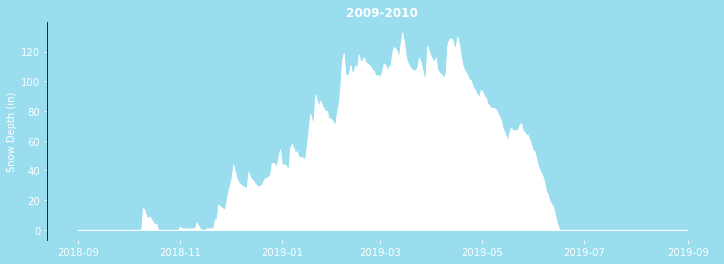

In [64]:
blue = '#99ddee'
white = '#ffffff'

fig, ax = plt.subplots(figsize=(12, 4), linewidth=5, facecolor=blue)

ax.set_facecolor(blue)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', colors=white)
ax.tick_params(axis='y', colors=white)
ax.set_ylabel('Snow Depth (in)', color=white)
ax.set_title('2009-2010', color=white, fontweight='bold')
ax.fill_between(data.index, data, color=white)
fig.savefig('c13-alta1.png', dpi=300, facecolor=blue)

Any number of plots may be put on a single figure. Let's refactor to a plot_year
function and plot many years:

In [25]:
import matplotlib.dates as mdt
blue = '#99ddee'
white = '#ffffff'

def plot_year(ax, data, years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Snow Depth (in)', color=white)
    ax.set_title('2009-2010', color=white, fontweight='bold')
    ax.fill_between(data.index, data, color=white)
    

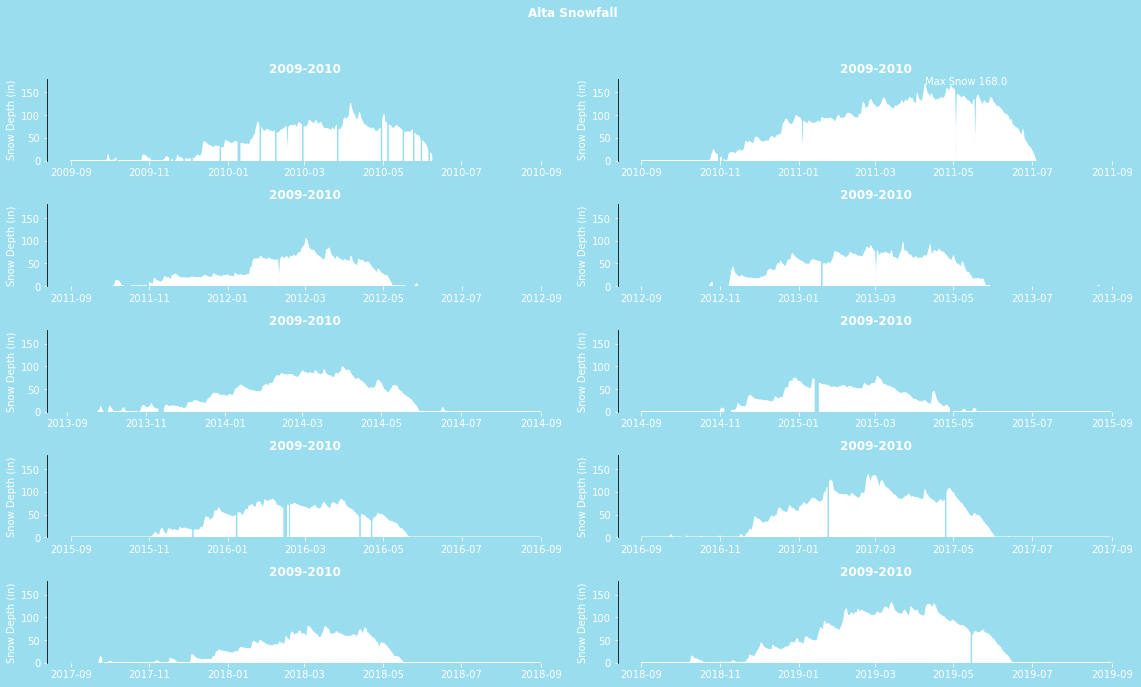

In [33]:
years = range(2009, 2019)

fig, axs = plt.subplots(ncols=2, nrows=int(len(years)/2),
                       figsize=(16, 10), linewidth=5, facecolor=blue)
axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i,y in enumerate(years):
    ax = axs[i]
    data = (alta
    .assign(DATE=pd.to_datetime(alta.DATE))
    .set_index('DATE')
    .loc[f'{y}-09':f'{y+1}-08']
    .SNWD
           )
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years = f'{y}-{y+1}'
    plot_year(ax, data, years)
    
max_ax.annotate(f'Max Snow {max_val}',
               xy=(mdt.date2num(max_data.idxmax()), max_val), 
               color=white)
fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('c13-alta2.png', dpi=300, facecolor=blue)


When I'm teaching visualization, I always mention that our brains are not optimized for
looking at tables of data. However, visualizing said data can give us insights into the data.
In this case, it is clear that there is data that is missing, hence the gaps in the plots. In this
case, I'm going to clean up the gaps using the .interpolate method:

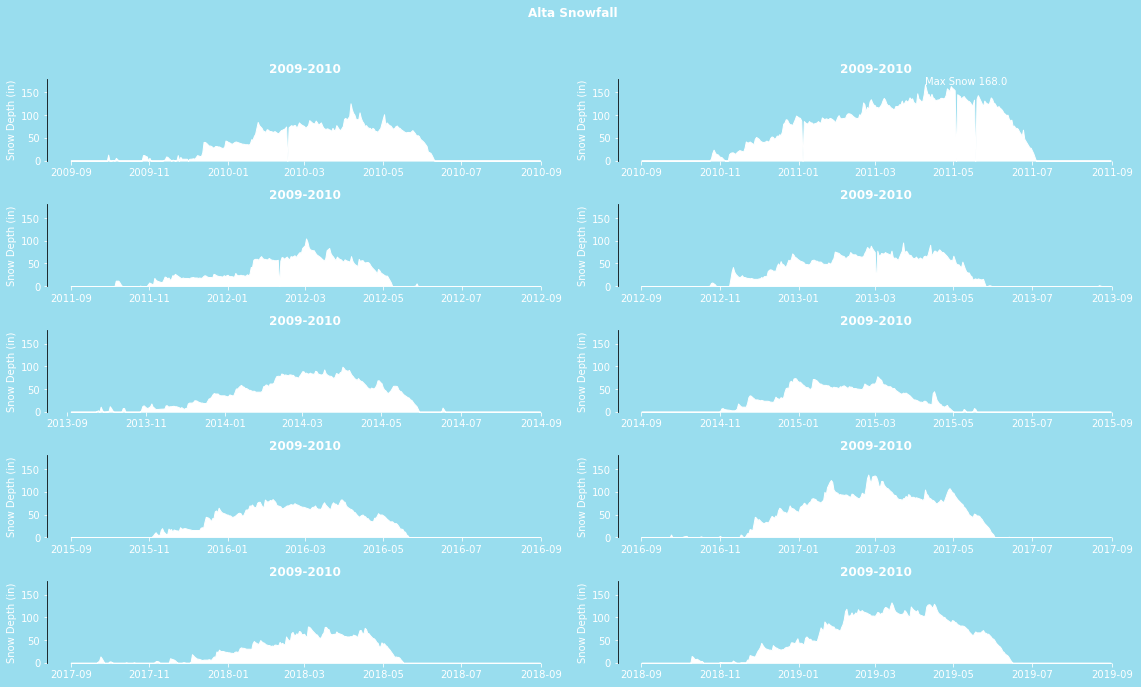

In [56]:
years = range(2009, 2019)

fig, axs = plt.subplots(ncols=2, nrows=int(len(years)/2),
                       figsize=(16, 10), linewidth=5, facecolor=blue)
axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i,y in enumerate(years):
    ax = axs[i]
    data = (alta
    .assign(DATE=pd.to_datetime(alta.DATE))
    .set_index('DATE')
    .loc[f'{y}-09':f'{y+1}-08']
    .SNWD
    .interpolate()
           )
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years = f'{y}-{y+1}'
    plot_year(ax, data, years)
    
max_ax.annotate(f'Max Snow {max_val}',
               xy=(mdt.date2num(max_data.idxmax()), max_val), 
               color=white)
fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('c13-alta3.png', dpi=300, facecolor=blue)


Even this plot still has issues. Let's dig in a little more. It looks like there are points during the
winter season when the snow level drops off too much. Let's use some pandas to find where
the absolute differences between subsequent entries is greater than some value, say 50:

In [57]:
(alta
 .assign(DATE=pd.to_datetime(alta.DATE))
 .set_index('DATE')
 .SNWD
 .to_frame()
 .assign(next=lambda df_: df_.SNWD.shift(-1),
        snwd_diff=lambda df_:df_.next-df_.SNWD)
 .pipe(lambda df_: df_[df_.snwd_diff.abs() > 50])
)

,SNWD,next,snwd_diff
DATE,,,
1989-11-27,60.0,0.0,-60.0
2007-02-28,87.0,9.0,-78.0
2008-05-22,62.0,0.0,-62.0
2008-05-23,0.0,66.0,66.0
2009-01-16,76.0,0.0,-76.0
2009-01-17,0.0,70.0,70.0
2009-05-14,52.0,0.0,-52.0
2009-05-15,0.0,51.0,51.0
2009-05-17,55.0,0.0,-55.0


 It looks like the data has some issues. There are spots when the data goes to zero (actually 0
and not np.nan) during the middle of the season. Let's make a fix_gaps function that we
can use with the .pipe method to clean them up:

In [59]:
def fix_gaps(ser, threshold=50):
    'Replace values where the shift is > threshold with nan'
    mask = (ser
    .to_frame()
    .assign(next=lambda df_:df_.SNWD.shift(-1),
    snwd_diff=lambda df_:df_.next-df_.SNWD)
    .pipe(lambda df_: df_.snwd_diff.abs() > threshold)
    )
    return ser.where(~mask, np.nan)

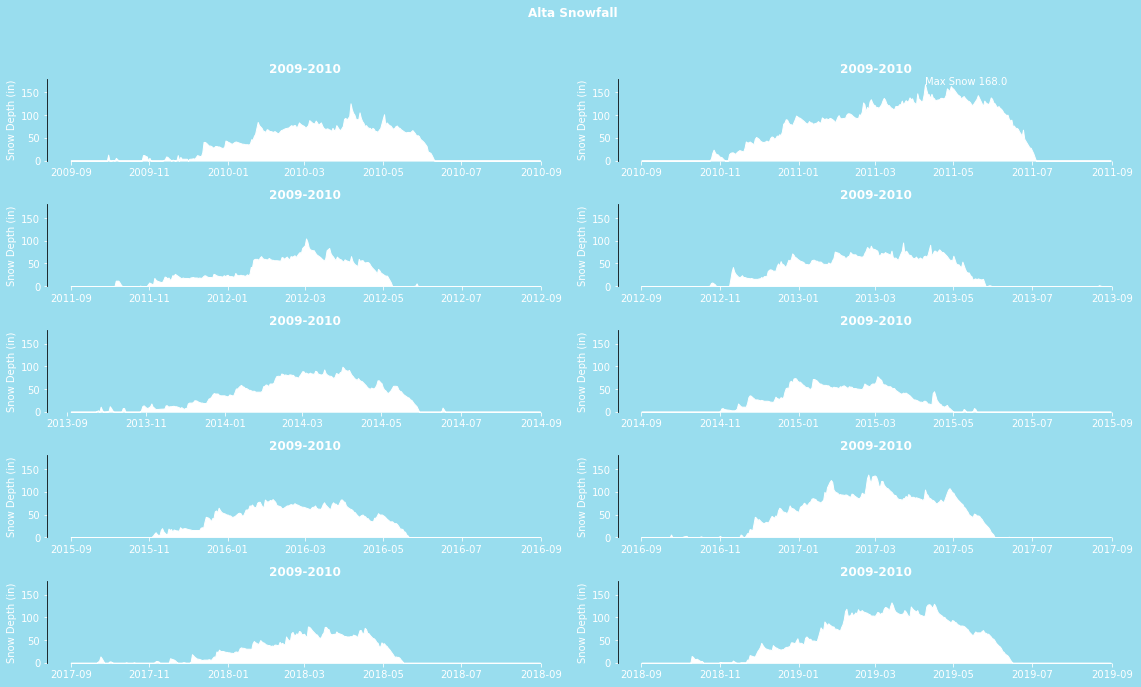

In [61]:
years = range(2009, 2019)

fig, axs = plt.subplots(ncols=2, nrows=int(len(years)/2),
                       figsize=(16, 10), linewidth=5, facecolor=blue)
axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i,y in enumerate(years):
    ax = axs[i]
    data = (alta
    .assign(DATE=pd.to_datetime(alta.DATE))
    .set_index('DATE')
    .loc[f'{y}-09':f'{y+1}-08']
    .SNWD
    .pipe(fix_gaps)       
    .interpolate()
    
           )
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years = f'{y}-{y+1}'
    plot_year(ax, data, years)
    
max_ax.annotate(f'Max Snow {max_val}',
               xy=(mdt.date2num(max_data.idxmax()), max_val), 
               color=white)
fig.suptitle('Alta Snowfall', color=white, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig('c13-alta4.png', dpi=300, facecolor=blue)


## Plotting basics with Pandas

pandas makes plotting quite easy by automating much of the procedure for you. Plotting is
handled internally by matplotlib and is publicly accessed through the DataFrame or Series
.plot attribute (which also acts as a method, but we will use the attribute for plotting). When
you create a plot in pandas, you will be returned a matplotlib Axes or Figure. You can then use
the full power of matplotlib to tweak this plot to your heart's delight.

##### Create a small DataFrame with a meaningful index:

In [66]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia',
                       'Stephanie', 'Monte'],
                 data={'Apples':[20, 10, 40, 20, 50],
                     'Oranges':[35, 40, 25, 19, 33]})

df
                 

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


Bar plots use the index as the labels for the x-axis and the column values as the bar
heights. Use the .plot attribute with the .bar method

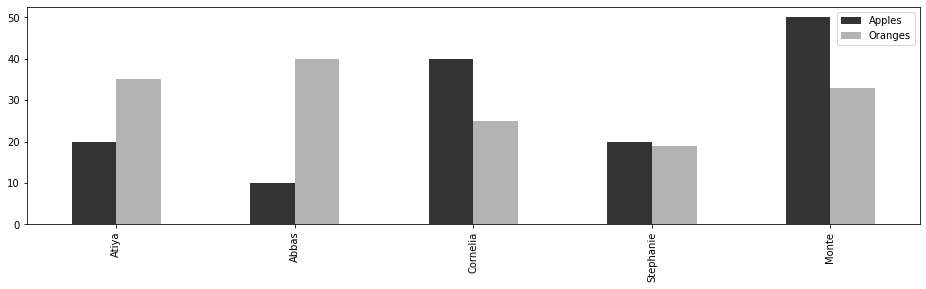

In [67]:
color = ['.2', '.7']
ax = df.plot.bar(color=color, figsize=(16, 4))
ax.get_figure().savefig('c13-pdemo-barl.png')

A KDE plot ignores the index and uses the column names along the x-axis and uses
the column values to calculate a probability density along the y values:

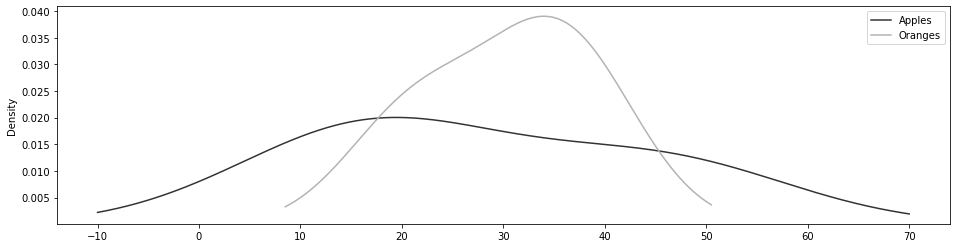

In [68]:
ax = df.plot.kde(color=color, figsize=(16, 4))
ax.get_figure().savefig('c13-pdemo-kdel.png')

Let's plot a line plot, scatter plot, and a bar plot in a single figure. The scatter plot is
the only one that requires you to specify columns for the x and y values. If you wish
to use the index for a scatter plot, you will have to use the .reset_index method
to make it a column. The other two plots use the index for the x-axis and make a
new set of lines or bars for every single numeric column:

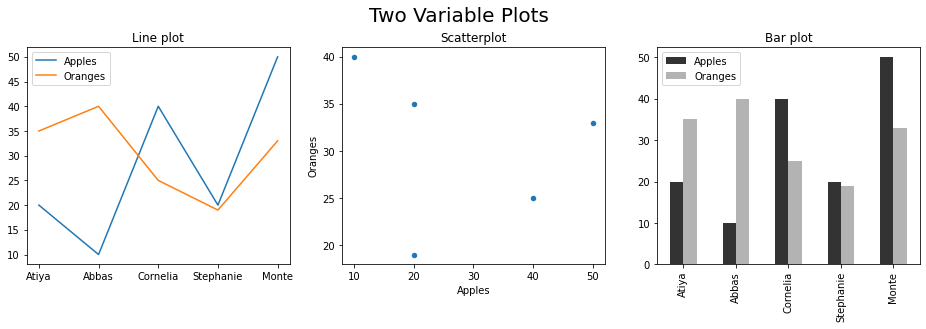

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot.line(ax=ax1, title="Line plot")
df.plot.scatter(x='Apples', y='Oranges', ax=ax2, title='Scatterplot')
df.plot.bar(color=color, ax=ax3, title='Bar plot')
fig.savefig('c13-pdemo-scat.png')

With the exception of the scatter plot, none of the plots specified the columns to be used.
pandas defaulted to plotting every numeric column, as well as the index in the case of twovariable
plots. You can, of course, specify the exact columns that you would like to use for
each x or y value:

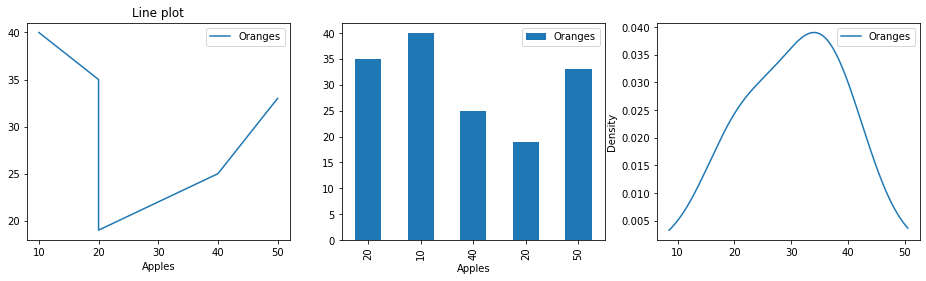

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

df.sort_values('Apples').plot.line(x='Apples', y='Oranges',ax=ax1, title="Line plot")

df.plot.bar(x='Apples', y='Oranges', ax=ax2)
df.plot.kde(x='Apples', ax=ax3)
fig.savefig('c13-pdemo-kde3.png')

### Visualizing the flights dataset

In [72]:
pd.set_option('max_columns', 7, 'max_rows', 20)
flights = pd.read_csv('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/flights.csv')

In [73]:
flights.head()

,MONTH,DAY,WEEKDAY,...,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,...,65.0,0,0
1,1,1,4,...,-13.0,0,0
2,1,1,4,...,35.0,0,0
3,1,1,4,...,-7.0,0,0
4,1,1,4,...,39.0,0,0


Before we start plotting, let's calculate the number of diverted, canceled, delayed, and ontime flights. We already have binary columns for DIVERTED and CANCELLED.
Flights are considered delayed whenever they arrive 15 minutes or more later than
scheduled. Let's create two new binary columns to track delayed and on-time arrivals:

In [75]:
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']

(flights
 .assign(DELAYED=flights['ARR_DELAY'].ge(15).astype(int),
        ON_TIME=lambda df_: 1 - df_[cols].any(axis=1))
 .select_dtypes(include='int')
 .sum()
)

MONTH          363858
DAY            918447
WEEKDAY        229690
SCHED_DEP    81186009
DIST         51057671
SCHED_ARR    90627495
DIVERTED          137
CANCELLED         881
DELAYED         11685
ON_TIME         45789
dtype: int64

Let's now make several plots on the same figure for both categorical and continuous
columns

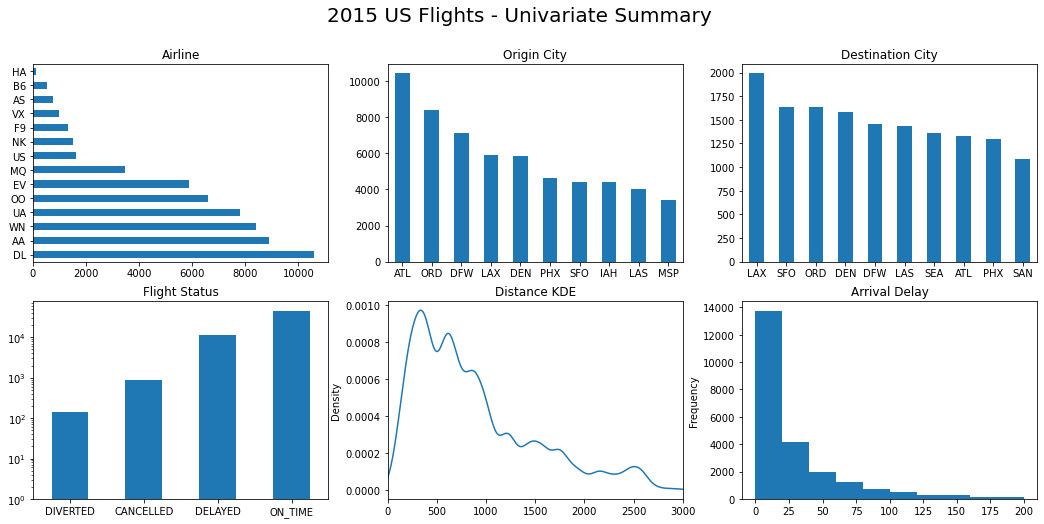

In [79]:
fig, ax_array = plt.subplots(2, 3, figsize=(18, 8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)
ac = flights['AIRLINE'].value_counts()
ac.plot.barh(ax=ax1, title='Airline')

(flights
 ['ORG_AIR']
 .value_counts()
 .plot.bar(ax=ax2, rot=0, title='Origin City')
)

(flights
 ['DEST_AIR']
 .value_counts()
 .head(10)
 .plot.bar(ax=ax3, rot=0, title='Destination City')
)

(flights
 .assign(DELAYED=flights['ARR_DELAY'].ge(15).astype(int), 
        ON_TIME=lambda df_: 1 - df_[cols].any(axis=1))
 [['DIVERTED', 'CANCELLED', 'DELAYED', 'ON_TIME']]
 .sum()
 .plot.bar(ax=ax4, rot=0, 
          log=True, title='Flight Status')
 
)


flights['DIST'].plot.kde(ax=ax5, xlim=(0, 3000),
                        title='Distance KDE')

flights['ARR_DELAY'].plot.hist(ax=ax6,
                             title='Arrival Delay',
                             range=(0, 200))

fig.savefig('c13-uni1.png')

This is not an exhaustive look at all the univariate statistics but gives us a good
amount of detail on some of the variables. Before we move on to multivariate plots,
let's plot the number of flights per week. This is the right situation to use a time series
plot with the dates on the x-axis. Unfortunately, we don't have pandas Timestamps in
any of the columns, but we do have the month and day. The to_datetime function
has a nifty trick that identifies column names that match Timestamp components.
For instance, if you have a DataFrame with exactly three columns titled year, month,
and day, then passing this DataFrame to the to_datetime function will return
a sequence of Timestamps. To prepare our current DataFrame, we need to add
a column for the year and use the scheduled departure time to get the hour and
minute:

In [80]:
df_date = (flights
           [['MONTH', 'DAY']]
           .assign(YEAR=2015, 
                  HOUR=flights['SCHED_DEP'] // 100,
                  MINUTE=flights['SCHED_DEP'] % 100)
          )

In [81]:
df_date

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20
...,...,...,...,...,...
58487,12,31,2015,5,15
58488,12,31,2015,19,10
58489,12,31,2015,18,46
58490,12,31,2015,5,25


Then, almost by magic, we can turn this DataFrame into a proper Series of
Timestamps with the to_datetime function:

In [82]:
flight_dep = pd.to_datetime(df_date)
flight_dep

0       2015-01-01 16:25:00
1       2015-01-01 08:23:00
2       2015-01-01 13:05:00
3       2015-01-01 15:55:00
4       2015-01-01 17:20:00
                ...        
58487   2015-12-31 05:15:00
58488   2015-12-31 19:10:00
58489   2015-12-31 18:46:00
58490   2015-12-31 05:25:00
58491   2015-12-31 08:59:00
Length: 58492, dtype: datetime64[ns]

Let's use this result as our new index and then find the count of flights per week with
the .resample method:

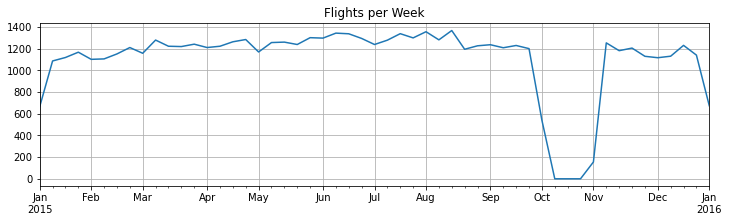

In [84]:
flights.index = flight_dep

fc = flights.resample('W').size()
fc.plot.line(figsize=(12, 3), title='Flights per Week', 
            grid=True)

fig.savefig('c13-tsl.png')

This plot is quite revealing. It appears that we have no data for the month of October.
Due to this missing data, it's quite difficult to analyze any trend visually, if one exists.
The first and last weeks are also lower than normal, likely because there isn't a full
week of data for them. Let's make any week of data with fewer than 600 flights
missing. Then, we can use the interpolate method to fill in this missing data:

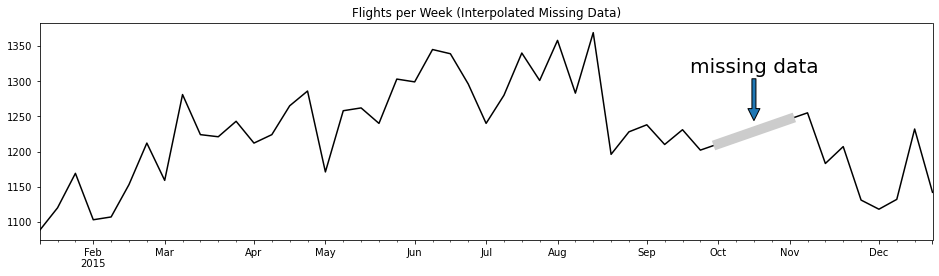

In [86]:
def interp_lt_n(df_, n=600):
    return (df_
    .where(df_ > n)
    .interpolate(limit_direction='both')
   )
fig, ax = plt.subplots(figsize=(16,4))

data = (flights
    .resample('W')
     .size()
  )
(data
    .pipe(interp_lt_n)
    .iloc[1:-1]
    .plot.line(color='black', ax=ax)
 )

mask = data<600
    
(data
    .pipe(interp_lt_n)
    [mask]
    .plot.line(color='.8', linewidth=10)
    )
ax.annotate(xy=(.8, .55), xytext=(.8, .77),
    xycoords='axes fraction', text='missing data',
    ha='center', size=20, arrowprops=dict())
ax.set_title('Flights per Week (Interpolated Missing Data)')
fig.savefig('c13-ts2.png')

Let's change directions and focus on multivariable plotting. Let's find the 10 airports
that:

 Have the longest average distance traveled for inbound flights

 Have a minimum of 100 total flights

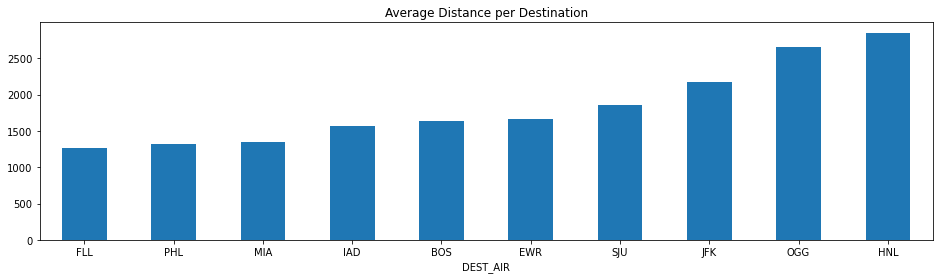

In [91]:
fig, ax = plt.subplots(figsize=(16, 4))
(flights
 .groupby('DEST_AIR')
 ['DIST']
 .agg(['mean', 'count'])
 .query('count > 100')
 .sort_values('mean')
 .tail(10)
 .plot.bar(y='mean', rot=0,  legend=False, ax=ax, 
          title='Average Distance per Destination')
)

fig.savefig('cl3-barl.png')

It's no surprise that the top two destination airports are in Hawaii. Now let's analyze
two variables at the same time by making a scatter plot between distance and
airtime for all flights under 2,000 miles:

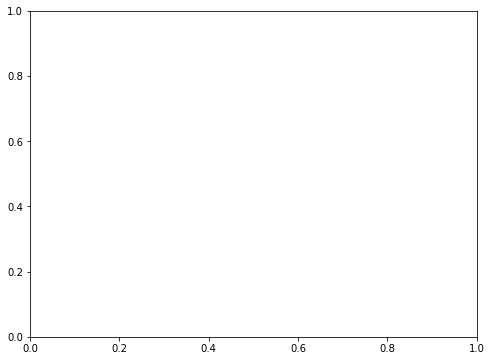

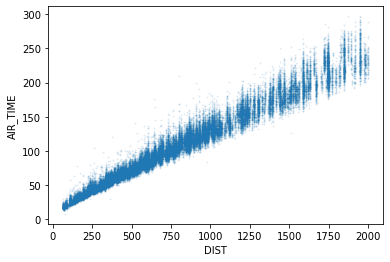

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))

(flights
 .reset_index(drop=True)
 [['DIST', 'AIR_TIME']]
 .query('DIST <= 2000')
 .dropna()
 .plot.scatter(x='DIST', y='AIR_TIME', alpha=.1, 
              s=1)
)
fig.savefig('c13-scat1.png')

As expected, a tight linear relationship exists between distance and airtime, though
the variance seems to increase as the number of miles increases. Let's look at the
correlation:

In [97]:
flights[['DIST', 'AIR_TIME']].corr()

,DIST,AIR_TIME
DIST,1.00000,0.98774
AIR_TIME,0.98774,1.00000


Back to the plot. There are a few flights that are quite far outside the trendline. Let's
try and identify them. A linear regression model may be used to formally identify
them, but as pandas doesn't support linear regression, we will take a more manual
approach. Let's use the cut function to place the flight distances into one of eight
groups:

In [98]:
(flights
 .reset_index(drop=True)
 [['DIST', 'AIR_TIME']]
 .query('DIST <= 2000')
 .dropna()
 .pipe(lambda df_: pd.cut(df_.DIST, 
                          bins=range(0, 2001, 250)))
 .value_counts()
 .sort_index()
)

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST, dtype: int64

We will assume that all flights within each group should have similar flight times,
and thus calculate for each flight the number of standard deviations that the flight
time deviates from the mean of that group:

In [100]:
zscore = lambda x: x.mean() / x.std()

In [101]:
short = (flights
          [['DIST', 'AIR_TIME']]
         .query('DIST <= 2000')
         .dropna()
         .reset_index(drop=True)
         .assign(BIN=lambda df_: pd.cut(df_.DIST, 
                                       bins=range(0, 2001, 250)))
        )

In [102]:
scores = (short
          .groupby('BIN')
          ['AIR_TIME']
          .transform(zscore)
         )
(short.assign(SCORE=scores))

,DIST,AIR_TIME,BIN,SCORE
0,590,94.0,"(500, 750]",7.736283
1,1452,154.0,"(1250, 1500]",10.835469
2,641,85.0,"(500, 750]",7.736283
3,1192,126.0,"(1000, 1250]",9.398000
4,1363,166.0,"(1250, 1500]",10.835469
...,...,...,...,...
53462,1464,166.0,"(1250, 1500]",10.835469
53463,414,71.0,"(250, 500]",6.099698
53464,262,46.0,"(250, 500]",6.099698
53465,907,124.0,"(750, 1000]",9.101791


We now need a way to discover the outliers. A box plot provides a visual for detecting
outliers (beyond 1.5 times the inner quartile range). To create a boxplot for each bin,
we need the bin names in the column names. We can use the .pivot method to do
this:

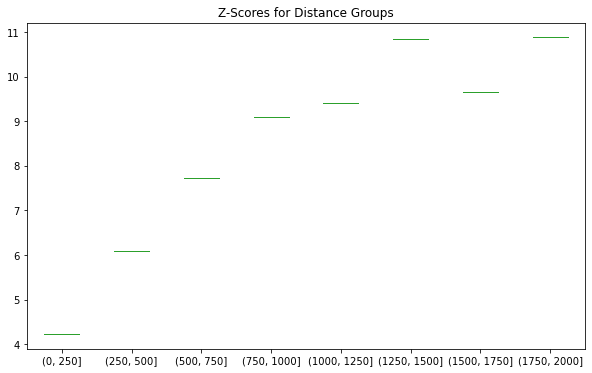

In [104]:
fig, ax = plt.subplots(figsize=(10,6))

(short.assign(SCORE=scores)
   .pivot(columns='BIN')
     ['SCORE']
    .plot.box(ax=ax)
)
ax.set_title('Z-Scores for Distance Groups')

fig.savefig('c13-box2.png')

Let's examine the points that are greater than six standard deviations away from the
mean. Because we reset the index in the flights DataFrame in step 9, we can use it to
identify each unique row in the flights DataFrame. Let's create a separate DataFrame
with just the outliers:

In [105]:
mask = (short
        .assign(SCORE=scores)
        .pipe(lambda df_: df_.SCORE.abs() > 6)
       )

In [107]:
outliers = (flights
            [['DIST', 'AIR_TIME']]
            .query('DIST <= 2000')
            .dropna()
            .reset_index(drop=True)
            [mask]
            .assign(PLOT_NUM=lambda df_: range(1, len(df_)+1))
           )

outliers

,DIST,AIR_TIME,PLOT_NUM
0,590,94.0,1
1,1452,154.0,2
2,641,85.0,3
3,1192,126.0,4
4,1363,166.0,5
...,...,...,...
53462,1464,166.0,46934
53463,414,71.0,46935
53464,262,46.0,46936
53465,907,124.0,46937


We can use this table to identify the outliers on the plot from step 9. pandas also
provides a way to attach tables to the bottom of the graph if we use the tables
parameter:

In [1]:
fig, ax = plt.subplots(figsize=(8,6))
(short
    .assign(SCORE=scores)
    .plot.scatter(x='DIST', y='AIR_TIME',
     alpha=.1, s=1, ax=ax,
     table=outliers)
    )
outliers.plot.scatter(x='DIST', y='AIR_TIME',
    s=25, ax=ax, grid=True)
outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n in outs.itertuples(index=False):
    ax.text(d + 5, t + 5, str(n))
plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible=False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')
fig.savefig('c13-scat3.png', dpi=300, bbox_inches='tight')

NameError: name 'plt' is not defined

## Stacking area charts to discover emerging trends

marketplace. It is a common choice to show the percentage of the market share for things
such as internet browsers, cell phones, or vehicles.

In [13]:
meetup = pd.read_csv('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/meetup_groups.csv',
                    parse_dates=['join_date'], index_col='join_date')
meetup

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us
...,...,...,...,...
2017-10-07 18:05:24,houston data visualization,Houston,TX,us
2017-06-24 14:06:26,houston data visualization,Houston,TX,us
2015-10-05 17:08:40,houston data visualization,Houston,TX,us


Let's get the number of people who joined each group each week:

In [16]:
(meetup
 .groupby([pd.Grouper(freq='W'), 'group'])
 .size()
)

join_date   group                       
2010-11-07  houstonr                         5
2010-11-14  houstonr                        11
2010-11-21  houstonr                         2
2010-12-05  houstonr                         1
2011-01-16  houstonr                         2
                                            ..
2017-10-15  houston data science            14
            houston data visualization      13
            houston energy data science      9
            houston machine learning        11
            houstonr                         2
Length: 763, dtype: int64

Unstack the group level so that each meetup group has its own column of data:

In [18]:
(meetup
 .groupby([pd.Grouper(freq='W'), 'group'])
 .size()
 .unstack('group', fill_value=0)
)

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0,0,0,0,5
2010-11-14,0,0,0,0,11
2010-11-21,0,0,0,0,2
2010-12-05,0,0,0,0,1
2011-01-16,0,0,0,0,2
...,...,...,...,...,...
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1


This data represents the number of members who joined that particular week. Let's
take the cumulative sum of each column to get the grand total number of members:

In [19]:
(meetup
 .groupby([pd.Grouper(freq='W'), 'group'])
 .size()
 .unstack('group', fill_value=0)
 .cumsum()
)

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0,0,0,0,5
2010-11-14,0,0,0,0,16
2010-11-21,0,0,0,0,18
2010-12-05,0,0,0,0,19
2011-01-16,0,0,0,0,21
...,...,...,...,...,...
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064


Many stacked area charts use the percentage of the total so that each row always
adds up to 1. Let's divide each row by the row total to find the relative number:

In [22]:
(meetup
 .groupby([pd.Grouper(freq='W'), 'group'])
 .size()
 .unstack('group', fill_value=0)
 .cumsum()
 .pipe(lambda df_: df_.div(
     df_.sum(axis=1), axis='index')
 ))


group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0.000000,0.000000,0.000000,0.000000,1.000000
2010-11-14,0.000000,0.000000,0.000000,0.000000,1.000000
2010-11-21,0.000000,0.000000,0.000000,0.000000,1.000000
2010-12-05,0.000000,0.000000,0.000000,0.000000,1.000000
2011-01-16,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481


We can now create our stacked area plot, which will continually accumulate the
columns, one on top of the other:

Text(0.86, 0.78, 'Machine Learning')

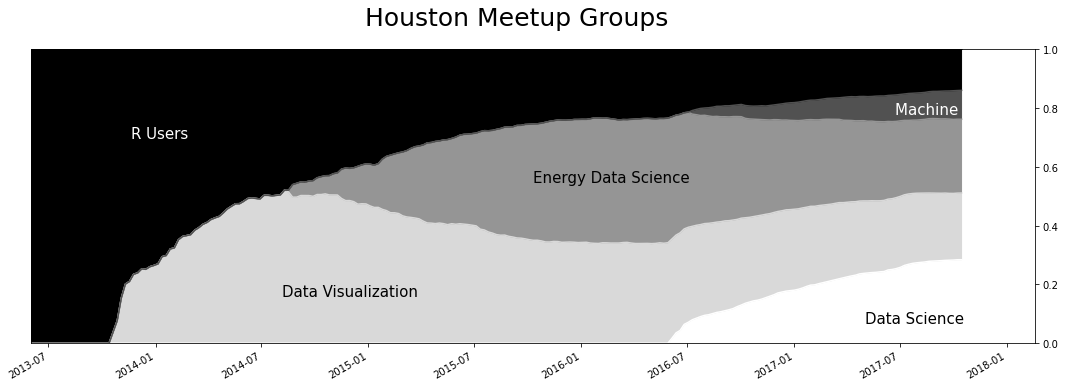

In [65]:
fig, ax = plt.subplots(figsize=(18,6))
(meetup
    .groupby([pd.Grouper(freq='W'), 'group'])
    .size()
    .unstack('group', fill_value=0)
    .cumsum()
    .pipe(lambda df_: df_.div(
     df_.sum(axis='columns'), axis='index'))
    .plot.area(ax=ax,
     cmap='Greys', xlim=('2013-6', None),
      ylim=(0, 1), legend=False)
)
 
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()
kwargs = {'xycoords':'axes fraction', 'size':15}
ax.annotate(xy=(.1, .7), text='R Users',
    color='w', **kwargs)
ax.annotate(xy=(.25, .16), text='Data Visualization',
    color='k', **kwargs)
ax.annotate(xy=(.5, .55), text='Energy Data Science',
            color='k', **kwargs)
ax.annotate(xy=(.83, .07), text='Data Science',
    color='k', **kwargs)
ax.annotate(xy=(.86, .78), text='Machine Learning',
    color='w', **kwargs) 

### Understanding the differece between seaborn and pandas

In [35]:
employee = pd.read_csv('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/employee.csv',
                    parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [41]:
import seaborn as sns


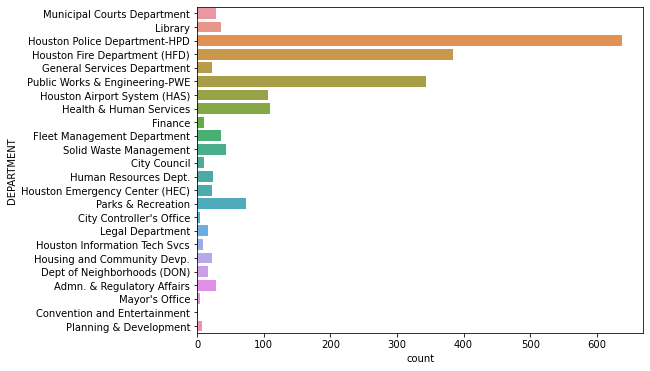

In [49]:
fig, ax = plt.subplots( figsize=(8, 6))
sns.countplot(y='DEPARTMENT', data=employee, ax=ax)
fig.savefig('c13-sns1.png', dpi=300, bbox_inches='tight')

To reproduce this plot with pandas, we will need to aggregate the data beforehand:

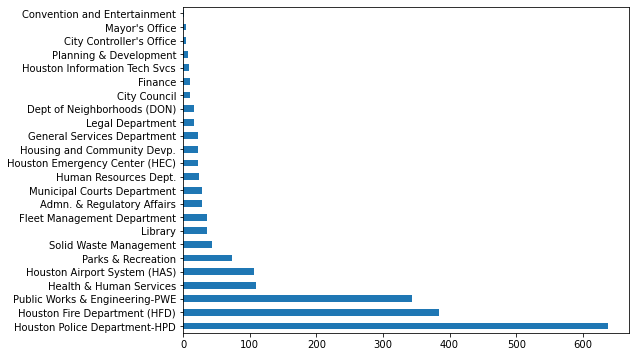

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

(employee
 ['DEPARTMENT']
 .value_counts()
 .plot.barh(ax=ax)
)
fig.savefig('c13-sns2.png', dpi=300, bbox_inches='tight')

Now, let's find the average salary for each race with seaborn

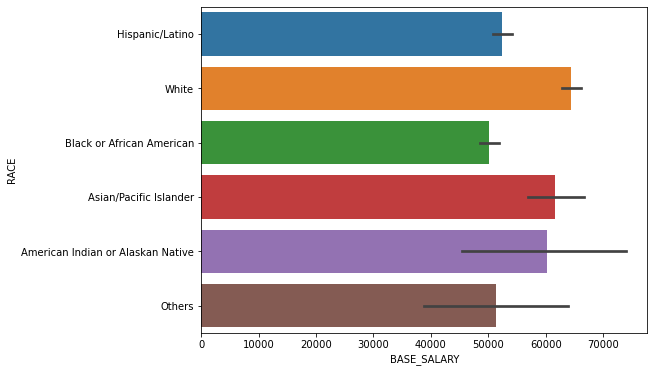

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y='RACE', x='BASE_SALARY', data=employee, ax=ax)
fig.savefig('c13-sns3.png', dpi=300, bbox_inches='tight')

To replicate this with pandas, we will need to group by RACE first:

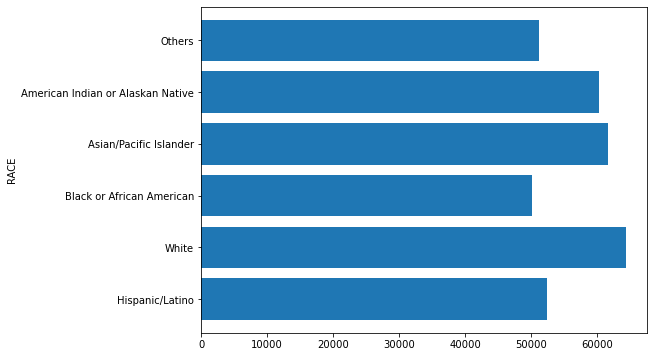

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
(employee
 .groupby('RACE', sort=False)
 ['BASE_SALARY']
 .mean()
 .plot.barh(rot=0, width=.8, ax=ax)
)

ax.set_label("Mean Salary")
fig.savefig('c13-sns4.png', dpi=300, bbox_inches='tight')

Seaborn also has the ability to distinguish groups within the data through a third
variable, hue, in most of its plotting functions. Let's find the mean salary by RACE and
GENDER:

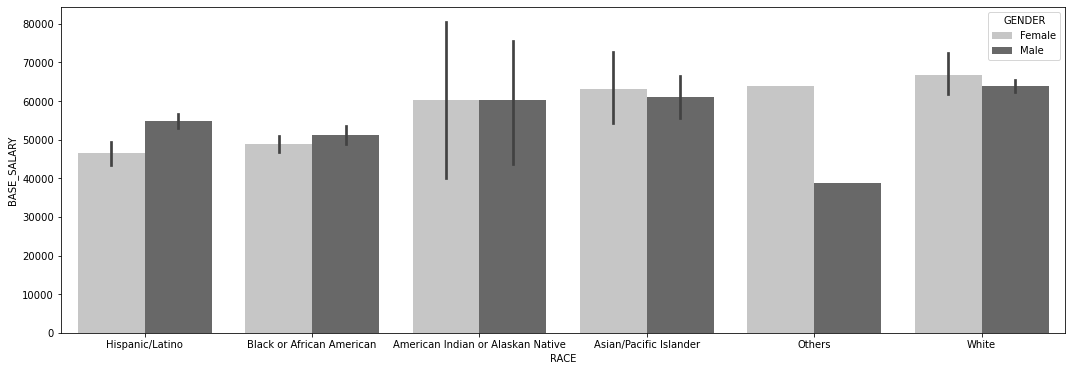

In [47]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER',
    ax=ax, data=employee, palette='Greys',
    order=['Hispanic/Latino',
    'Black or African American',
    'American Indian or Alaskan Native',
    'Asian/Pacific Islander', 'Others',
           'White'])
fig.savefig('c13-sns5.png', dpi=300, bbox_inches='tight')

with pandas, we will have to group by both RACE and GENDER and then unstack the
genders as column names:

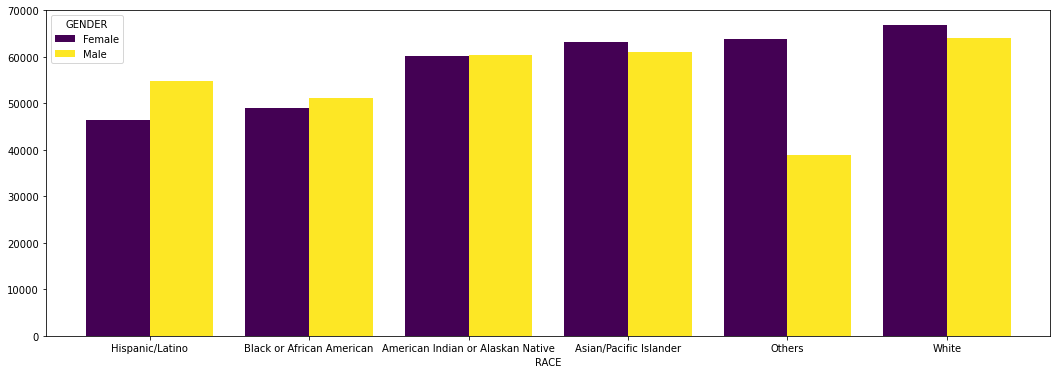

In [55]:
fig, ax = plt.subplots(figsize=(18, 6))
(employee
 .groupby(['RACE', 'GENDER'], sort=False)
 ['BASE_SALARY']
 .mean()
 .unstack('GENDER')
 .sort_values('Female')
 .plot.bar(rot=0, ax=ax, 
          width=.8, cmap='viridis')
 
)

fig.savefig('c13-sns6.png', dpi=300, bbox_inches='tight')

A box plot is another plot that both seaborn and pandas have in common. Let's
create a box plot of salary by RACE and GENDER with seaborn:

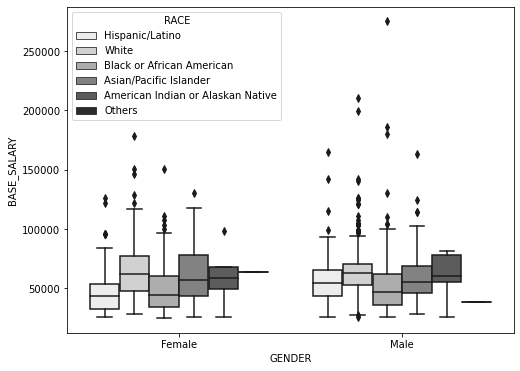

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, 
           hue='RACE', palette='Greys', ax=ax)

fig.savefig('c13-sns7.png', dpi=300, bbox_inches='tight')

pandas is not easily able to produce an exact replication for this box plot. It can
create two separate Axes for gender and then make box plots of salaries by race:

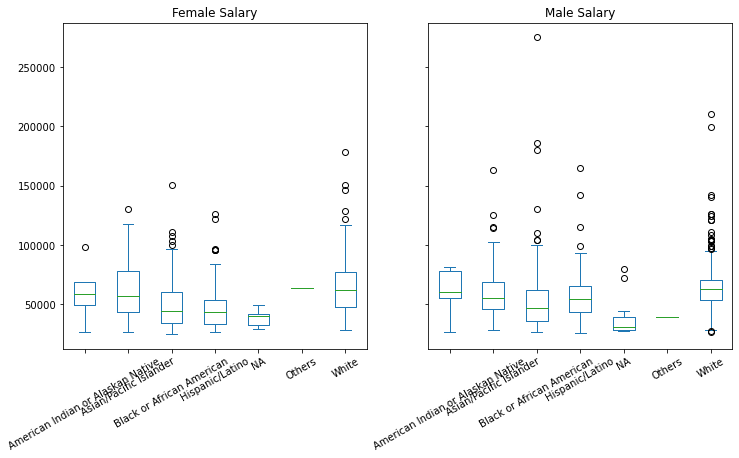

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for g, ax in zip(['Female', 'Male'], axs):
    (employee
       .query('GENDER == @g')
       .assign(RACE=lambda df_:df_.RACE.fillna('NA'))
       .pivot(columns='RACE')
        ['BASE_SALARY']
        .plot.box(ax=ax, rot=30)
       )
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
    
    
fig.savefig('c13-sns8.png', bbox_inches='tight')

### Multivariate analysis with seaborn Grids

Seaborn has the ability to facet multiple plots in a grid. Certain functions in seaborn do
not work at the matplotlib axis level, but rather at the figure level. These include catplot,
lmplot, pairplot, jointplot, and clustermap.

In [70]:
emp = pd.read_csv('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/employee.csv',
                    parse_dates=['HIRE_DATE', 'JOB_DATE'])
emp

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [67]:
def yrs_exp(df_):
    days_hired = pd.to_datetime('12-1-2016') - df_.HIRE_DATE
    return days_hired.dt.days / 365.25

In [71]:
emp = (emp
      .assign(YEARS_EXPERIENCE=yrs_exp))

emp[['HIRE_DATE', 'YEARS_EXPERIENCE']]

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.472279
1,2000-07-19,16.369610
2,2015-02-03,1.826146
3,1982-02-08,34.811773
4,1989-06-19,27.452430
...,...,...
1995,2014-06-09,2.480493
1996,2003-09-02,13.248460
1997,2014-10-13,2.135524
1998,2009-01-20,7.863107


Let's create a scatter plot with a fitted regression line to represent the relationship
between years of experience and salary:

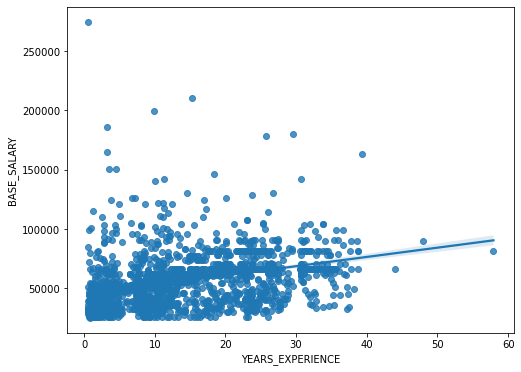

In [75]:
fig, ax  = plt.subplots(figsize=(8, 6))
sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', data=emp, ax=ax)

fig.savefig('c13-scat4.png', dpi=300, bbox_inches='tight')

The regplot function cannot plot multiple regression lines for different columns.
Let's use the lmplot function to plot a seaborn grid that adds regression lines for
males and females:

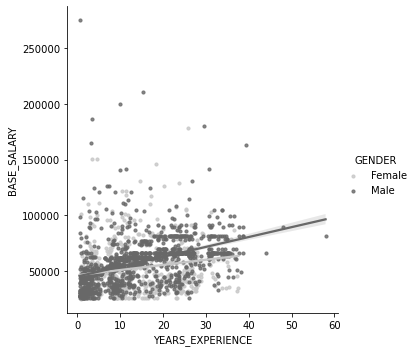

In [78]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', palette='Greys', 
                  scatter_kws={'s':10}, data=emp)
grid.fig.savefig('c13-scat5.png', dpi=300, bbox_inches='tight')

The real power of the seaborn grid functions is their ability to add more Axes
based on another variable. The lmplot function has the col and row parameters
available to divide the data further into different groups. For instance, we can create
a separate plot for each unique race in the dataset and still fit the regression lines
by gender:

C:\Users\justine.o_kobo360\anaconda31\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


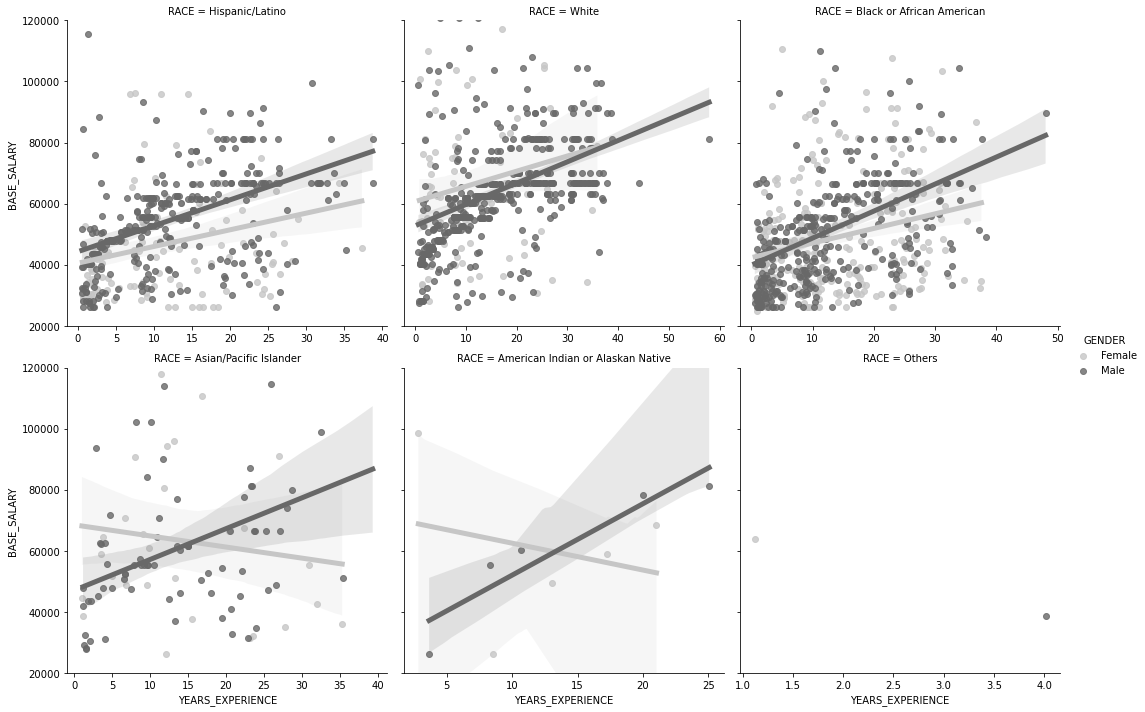

In [80]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
         hue='GENDER', col='RACE', col_wrap=3,
           palette='Greys', sharex=False,
          line_kws = {'linewidth':5},
         data=emp)
grid.set(ylim=(20000, 120000))

grid.fig.savefig('c13-scat6.png', dpi=300, bbox_inches='tight')

We can do a similar type of analysis when we have categorical features. First, let's reduce
the number of levels in the categorical variables RACE and DEPARTMENT to the top two and
three most common, respectively:

In [81]:
deps = emp['DEPARTMENT'].value_counts().index[:2]
races = emp['RACE'].value_counts().index[:3]
is_dep = emp['DEPARTMENT'].isin(deps)
is_race = emp['RACE'].isin(races)
emp2 = (emp
        [is_dep & is_race]
        .assign(DEPARTMENT=lambda df_:
        df_['DEPARTMENT'].str.extract('(HPD|HFD)',
          expand=True))
     )
emp2.shape

(968, 11)

In [82]:
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [84]:
emp2.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,YEARS_EXPERIENCE
2,2,POLICE OFFICER,HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,1.826146
3,3,ENGINEER/OPERATOR,HFD,63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,34.811773
5,5,SENIOR POLICE OFFICER,HPD,66614.0,Black or African American,Full Time,Male,Active,1984-11-26,2005-03-26,32.013689
10,10,FIRE FIGHTER,HFD,52644.0,Hispanic/Latino,Full Time,Male,Active,2007-05-21,2008-11-15,9.533196
14,14,POLICE SERGEANT,HPD,77076.0,Black or African American,Full Time,Male,Active,2001-06-04,2015-05-25,15.493498


In [85]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

Let's use one of the simpler Axes-level functions, such as violinplot to view the distribution
of years of experience by gender:

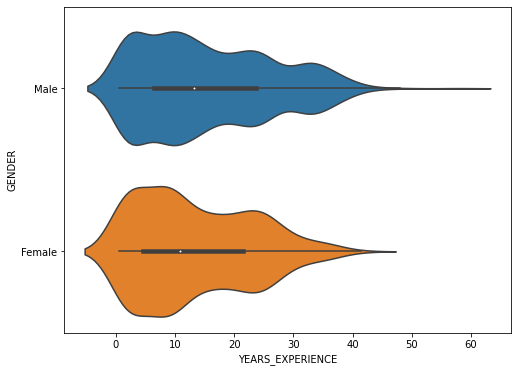

In [86]:
common_depts = (emp
               .groupby('DEPARTMENT')
               .filter(lambda group : len(group) > 50)
               )
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='YEARS_EXPERIENCE', y='GENDER',
               data=common_depts)

fig.savefig('c13-viol.png', dpi=300, bbox_inches='tight')


We can then use the catplot to add a violin plot for each unique combination of department
and race with the col and row parameters:

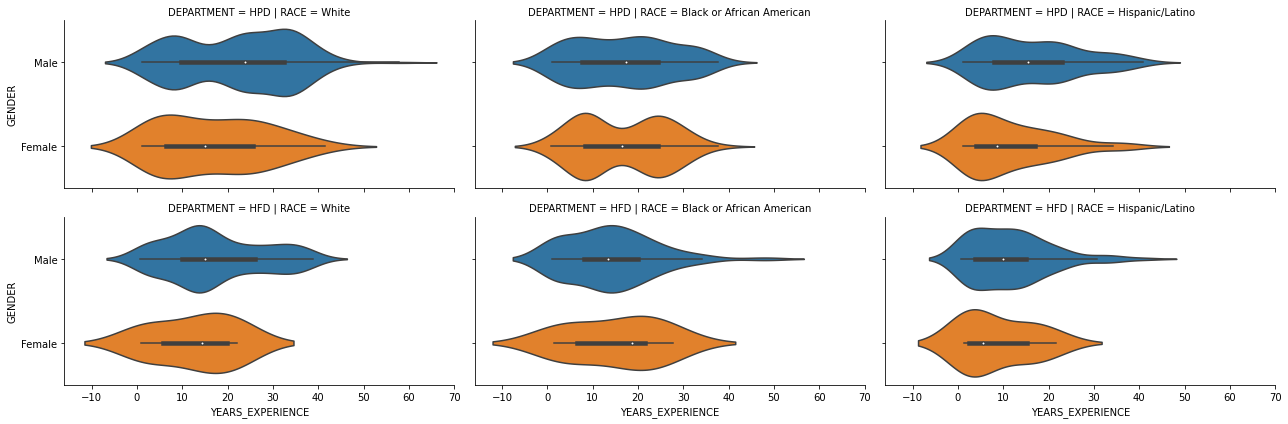

In [87]:
grid = sns.catplot(x='YEARS_EXPERIENCE', y='GENDER',
       col='RACE', row='DEPARTMENT',
       height=3, aspect=2,
       data=emp2, kind='violin')

grid.fig.savefig('c13-vio2.png', dpi=300, bbox_inches='tight')

## Uncovering Simpson's Paradox in the diamonds datset with seaborn

In [88]:
dia = pd.read_csv('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/diamonds.csv',
                    )

In [89]:
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Text(0.5, 0.98, 'Price Decreasing with Increasing Quality?')

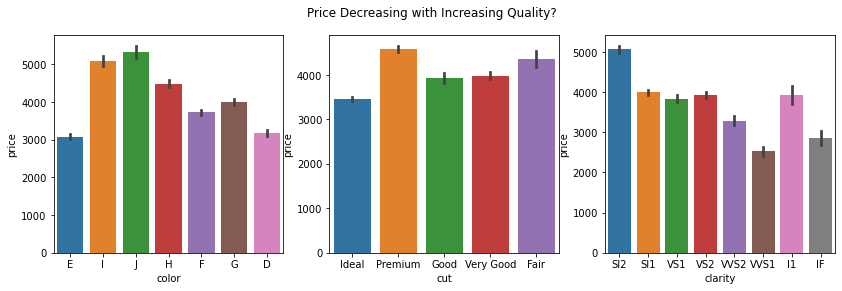

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='price', data=dia, ax=ax1)
sns.barplot(x='cut', y='price', data=dia, ax=ax2)
sns.barplot(x='clarity', y='price', data=dia, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')

Before we begin analysis, let's change the cut, color, and clarity columns into
ordered categorical variables:

In [91]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2',
           'VS1', 'VVS2', 'VVS1', 'IF']

dia2 = (dia
         .assign(cut=pd.Categorical(dia['cut'],
                  categories=cut_cats,
                   ordered=True),
                color=pd.Categorical(dia['color'],
                  categories=color_cats,
                     ordered=True),
                 clarity=pd.Categorical(dia['clarity'],
                        categories=clarity_cats,
                         ordered=True))
       )

dia2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Seaborn uses category orders for its plots. Let's make a bar plot of the mean price for
each level of the cut, color, and clarity columns:

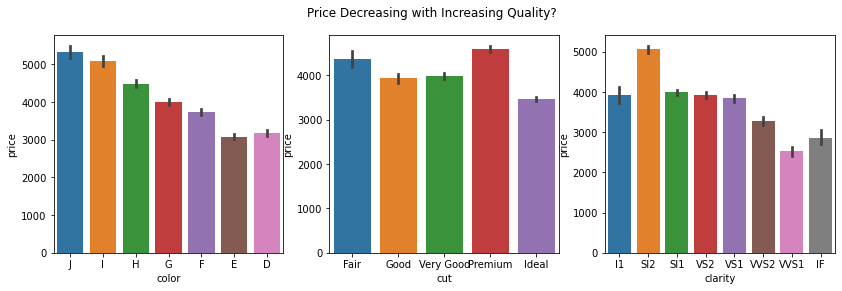

In [93]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='price', data=dia2, ax=ax1)
sns.barplot(x='cut', y='price', data=dia2, ax=ax2)
sns.barplot(x='clarity', y='price', data=dia2, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')
fig.savefig('c13-bar4.png', dpi=300, bbox_inches='tight')

There seems to be a decreasing trend for color and price. The highest quality cut
and clarity levels also have low prices. How can this be? Let's dig a little deeper and
plot the price for each diamond color again, but make a new plot for each level of
the clarity column:

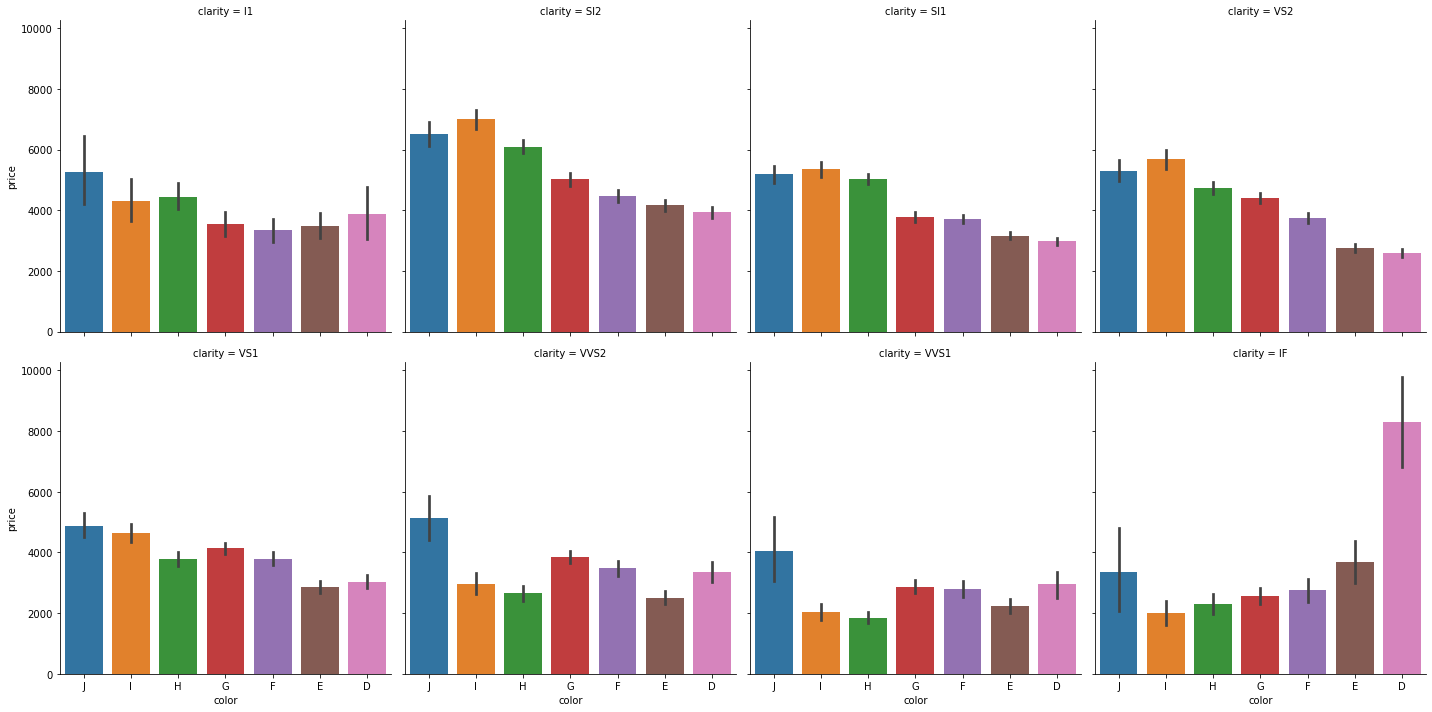

In [95]:
grid = sns.catplot(x='color', y='price', col='clarity',
         col_wrap=4, data=dia2, kind='bar')
grid.fig.savefig('c13-bar5.png', dpi=300, bbox_inches='tight')

This plot is a little more revealing. Although price appears to decrease as the quality
of color increases, it does not do so when clarity is at its highest level. There is a
substantial increase in price. We have yet to look at just the price of the diamond
without paying any attention to its size. Let's recreate the plot from step 3 but use the
carat size in place of price:

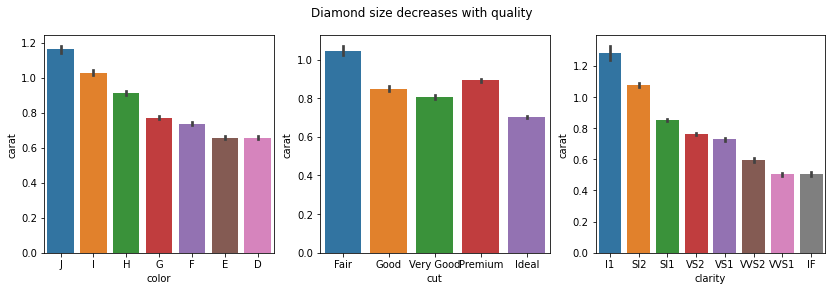

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=dia2, ax=ax1)
sns.barplot(x='cut', y='carat', data=dia2, ax=ax2)
sns.barplot(x='clarity', y='carat', data=dia2, ax=ax3)
fig.suptitle('Diamond size decreases with quality')
fig.savefig('c13-bar6.png', dpi=300, bbox_inches='tight')

Now our story is starting to make a bit more sense. Higher quality diamonds appear
to be smaller in size, which intuitively makes sense. Let's create a new variable that
segments the carat values into five distinct sections, and then create a point plot.
The plot that follows reveals that higher quality diamonds do, in fact, cost more
money when they are segmented based on size

In [98]:
dia2 = (dia2
       .assign(carat_category=pd.qcut(dia2.carat, 5))
       )

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_category
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(0.199, 0.35]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(0.199, 0.35]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(0.199, 0.35]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(0.199, 0.35]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(0.199, 0.35]"
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,"(0.53, 0.9]"
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,"(0.53, 0.9]"
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,"(0.53, 0.9]"
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,"(0.53, 0.9]"


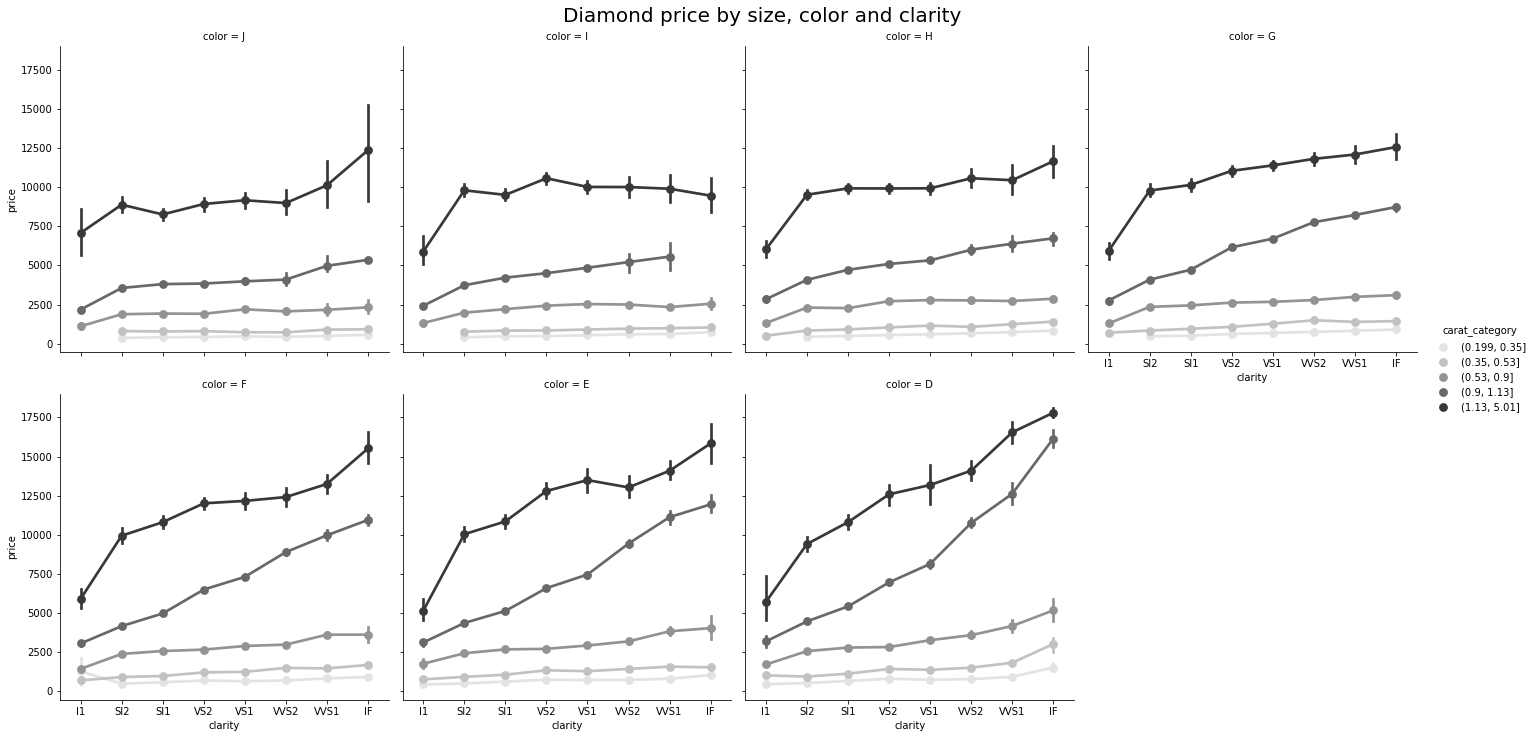

In [101]:
from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))
grid = sns.catplot(x='clarity', y='price', data=dia2,
                  hue='carat_category', col='color',
                  col_wrap=4, kind='point', palette=greys)
grid.fig.suptitle('Diamond price by size, color and clarity',
         y=1.02, size=20)
grid.fig.savefig('c13-bar7.png', dpi=300, bbox_inches='tight')